<a href="https://colab.research.google.com/github/felipemontano10/ComputerVision/blob/master/PS-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### COMPSCI 527 - Spring 2020
## Homework 5
**Collaborators:**


> Haozhe Zhang 

> Felipe Montano-Campos





##### **Part 1 (Graded): Back-Propagation**



**Poblem 1.1** 

Yes. As we can see we only have layer in our neural network with two neurons and the network is fully connected.

**Problem 1.2**

Let's recall that the ReLU function is defined as:
$$
\rho(a)=max(0,a)
$$
Hence, if $x_{1}=2$ and $x_{2}=3$, for the first neuron we have

\begin{align*}
    y_{1}=&max(0,w_{3}+x_{1}w_{1}+x_{2}w_{2})\\
    &= max(0,-4)\\
    &=0
\end{align*}

For the second neuron we have

\begin{align*}
    y_{2}=&max(0,w_{6}+x_{1}w_{4}+x_{2}w_{5})\\
    &= max(0,8)\\
    &=8
\end{align*}

Finally, we can compute $y$ as,

\begin{align*}
    y=&max(0,w_{9}+y_{1}w_{7}+y_{2}w_{8})\\
    = & 13  
\end{align*}

**Problem 1.3**

Let's calculate the gradient $\mathbf{g}$ of the output $y$ respect the weight vector $\mathbf{w}$ of our neural network taking into consideration that the derivative of the ReLu function $h(x)$ is 0 when $x<0$ :

\begin{align*}
    \frac{\partial y}{\partial w_{9}}=& 1\\
    \frac{\partial y}{\partial w_{8}}=& y_{2}\\
    \frac{\partial y}{\partial w_{7}}=& y_{1}\\
    \frac{\partial y}{\partial w_{6}}=& \frac{\partial y}{\partial y_2}\frac{\partial y_2}{\partial w_{6}}\\
    =& w_8 \\
    \frac{\partial y}{\partial w_{5}}=&  \frac{\partial y}{\partial y_2}\frac{\partial y_2}{\partial w_{5}}\\
    =& w_8 x_2\\
    \frac{\partial y}{\partial w_{4}}=&  \frac{\partial y}{\partial y_2}\frac{\partial y_2}{\partial w_{4}}\\
    =& w_8 x_1\\
    \frac{\partial y}{\partial w_{3}}=&  \frac{\partial y}{\partial y_1}\frac{\partial y_1}{\partial w_{3}}\\
    =& w_7  \\
    \frac{\partial y}{\partial w_{2}}=&  \frac{\partial y}{\partial y_1}\frac{\partial y_1}{\partial w_{2}}\\
    =& w_7 x_2\\
    \frac{\partial y}{\partial w_{1}}=&  \frac{\partial y}{\partial y_1}\frac{\partial y_1}{\partial w_{1}}\\
    =& w_7 x_1    
\end{align*}

Hence the gradient can be written as, 
$$
\frac{\partial \mathbf{g}}{\partial \mathbf{w}}=\begin{pmatrix}
0\\
0\\
0\\
w_8 x_1\\
w_8 x_2\\
w_8\\
y_1\\
y_2\\
1
\end{pmatrix}=\begin{pmatrix}
0\\
0\\
0\\
4\\
6\\
2\\
0\\
8\\
1
\end{pmatrix}
$$
given the fact that $\frac{\partial y_1}{\partial w_{1}}$, $\frac{\partial y_1}{\partial w_{2}}$, and $\frac{\partial y_1}{\partial w_{3}}$ are equal to 0 since the argument of the function $y_{1}$ is negative.



##### **Part 2(Graded): Back-Propagation for Convolutional Networks**

**Problem 2.1**

We can write the valid correlation of $\mathbf{x}$ and $\mathbf{h}$ as:

\begin{align*}
 a_{0} =& h_{0}x_{0}+h_{1}x_{1}+h_{2}x_{2}\\
 a_{1} =& h_{0}x_{1}+h_{1}x_{2}+h_{2}x_{3}\\
 a_{2} =& h_{0}x_{2}+h_{1}x_{3}+h_{2}x_{4}
\end{align*}

**Problem 2.2**

Consider the following Jacobian matrix:

$$
\mathbf{J_{a,h}}=\frac{\delta a}{\delta h}=\begin{pmatrix}
x_0 & x_1 & x_2\\
x_1 & x_2 & x_3\\
x_2 & x_3 & x_4
\end{pmatrix}
$$

**Problem 2.3**

Let's write the correlation $\hat{y}$ as:

$$
\hat{y}= a_{0}k_{0}+a_{1}k_{1}+a_{2}k_{2}
$$

So, the Jacobian is defined as:

$$
\mathbf{J_{\hat{y},k}}=\frac{\partial \hat{y}}{\partial k}=\begin{pmatrix}
a_0\\
a_1\\
a_2\\
\end{pmatrix}
$$

**Problem 2.4**

So, the Jacobian is defined as:

$$
\mathbf{J_{\hat{y},a}}=\frac{\partial \hat{y}}{\partial a}=\begin{pmatrix}
k_0\\
k_1\\
k_2\\
\end{pmatrix}
$$

**Problem 2.5**



Our loss function is defined as follows:

$$
\lambda = l(y,\hat{y})=\frac{1}{2}(y-\hat{y})^{2}
$$

In order to calculate $\hat{y}$ first, and then $\lambda$, we need to calculate $a=[a_1,a_2,a_3]$:

\begin{align*}
    a_1=& -1(1)+2(0)+1(-1)\\
    =&-2\\
    a_2=& -1(0)+2(-1)+1(2)\\
    =&0\\
    a_3=& -1(-1)+2(2)+1(1)\\
    =&6
\end{align*}
so we have:
$$
a=[a_1,a_2,a_3]=[-2,0,6]
$$
We can calculate $\hat{y}$ as:
$$
\begin{align*}
    \hat{y}=& -2(2)+0+6\\
    =& 2
\end{align*}
$$
Finally, 
$$
\begin{align*}
    \lambda=&\frac{1}{2}(4-2)^{2}\\
    =&2
\end{align*}
$$

**Problem 2.6**

Let's compute the gradient $\frac{\partial \lambda}{\partial \mathbf{w}}$:

\begin{align*}
    \frac{\partial \lambda}{\partial h_0}=& \frac{\partial \lambda}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a}\frac{\partial a}{\partial h_0}\\
    \frac{\partial \lambda}{\partial h_1}=& \frac{\partial \lambda}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a}\frac{\partial a}{\partial h_1}\\
    \frac{\partial \lambda}{\partial h_2}=& \frac{\partial \lambda}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial a}\frac{\partial a}{\partial h_2}\\
    \frac{\partial \lambda}{\partial k_0}=& \frac{\partial \lambda}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial k_0}\\
    \frac{\partial \lambda}{\partial k_1}=& \frac{\partial \lambda}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial k_1}\\
    \frac{\partial \lambda}{\partial k_2}=& \frac{\partial \lambda}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial k_2}\\
\end{align*}

If we follow the notation derived in problem 2.4 and 2.5 we can write the gradient as:

$$
\frac{\partial \lambda}{\partial \mathbf{w}}=\begin{pmatrix}
\frac{\partial \lambda}{\partial \hat{y}}\mathbf{J_{\hat{y},a}}\cdot \mathbf{J_{a,h}}\\
\frac{\partial \lambda}{\partial \hat{y}}\mathbf{J_{\hat{y},k}}
\end{pmatrix}
$$
where, 
$$
\frac{\partial \lambda}{\partial \hat{y}}= \hat{y}-y=-2
$$

$$
\mathbf{J_{\hat{y},a}}=\frac{\partial \hat{y}}{\partial a}=\begin{pmatrix}
k_0\\
k_1\\
k_2\\
\end{pmatrix}^{T} = \begin{pmatrix}
2&
0&
1
\end{pmatrix}
$$

$$
\mathbf{J_{a,h}}=\frac{\partial a}{\partial h}=\begin{pmatrix}
x_0 & x_1 & x_2\\
x_1 & x_2 & x_3\\
x_2 & x_3 & x_4
\end{pmatrix}=\begin{pmatrix}
1,0,-1\\
0,-1,2\\
-1,2,1\\
\end{pmatrix}
$$


$$
\mathbf{J_{\hat{y},k}}=\frac{\partial \hat{y}}{\partial k}=\begin{pmatrix}
a_0\\
a_1\\
a_2\\
\end{pmatrix}^{T}=\begin{pmatrix}
-2&
0&
6
\end{pmatrix}
$$



Doing all the calculations we have
$$
\frac{\lambda}{\partial \mathbf{w}}=\begin{pmatrix}
-2\\
-4\\
2\\
4\\
0\\
-12\end{pmatrix}
$$

**Problem 2.7**

Let's recall that $a=[a_0,a_1,a_2]$ is defined as:

\begin{align*}
 a_{0} =& h_{0}x_{0}+h_{1}x_{1}+h_{2}x_{2}\\
 a_{1} =& h_{0}x_{1}+h_{1}x_{2}+h_{2}x_{3}\\
 a_{2} =& h_{0}x_{2}+h_{1}x_{3}+h_{2}x_{4}
\end{align*}

and,
$$
\hat{y}=k_{0}a_{0}+k_{1}a_{1}+k_{2}a_{2}
$$
Plugging $a$ in $\hat{y}$, we have

\begin{align*}
\hat{y} =& (h_{0}x_{0}+h_{1}x_{1}+h_{2}x_{2})k_{0}+(h_{0}x_{1}+h_{1}x_{2}+h_{2}x_{3})k_{1}+(h_{0}x_{2}+h_{1}x_{3}+h_{2}x_{4})k_{2}\\
=& x_{0}\underbrace{(h_{0}k_{0})}_{c_{0}}+x_{1}\underbrace{(h_{1}k_{0}+h_{0}k_{1})}_{c_{1}}+x_{2}\underbrace{(h_{2}k_{0}+h_{1}k_{1}+h_{0}k_{2})}_{c_{2}}+x_{3}\underbrace{(h_{2}k_{1}+h_{1}k_{2})}_{c_{3}}+x_{4}\underbrace{(h_{2}k_{2})}_{c_{4}}\\
=&1(-2)+0(4+0)+(-1)(2+0-1)+(2)(0+2)+1(1)\\
=&-2-1+4+1\\
=& 2
\end{align*}

As we can see we obtained the same value as before.

##### **Part 3 (Graded): Training Neural Networks**

**Problem 3.1**

Let's recall that the ReLU function is defined as:

$$
\rho(a) = max(0,a)
$$
where $a$ is the activation term in neuron $j$ in layer $i$ and can be written as, 

$$
a^{j} = \mathbf{w_{j}}x^{j}
$$

where $\mathbf{w_{j}}$ is the vector of weights and $x^{j}$ is the input for neuron $j$ (recall that the input is the same for all the neurons in layer $i$).
Let's recall that every layer has an $n$ number of neurons. Hence we can collect all the weights of all the neurons in the same layer $i$ and denote them as $w^{(i)}=[w_{1},...,w_{j}]$. If we do the same and collect all the weight for all the layers and denote it as $w=[w^{1},...,w^{k}]$.

If vector $w=\mathbf{0}$, all the outputs of every layer ($x^{(k)}$) will be $\mathbf{0}$, since across the layers and neurons the activation term ($a$) will always be zero. If this is the case training would not be possible, since the prediction will always be $0$ and when we do back-propagation we will not be able to change the values of the initial weights since all the the derivatives $\frac{\partial l_{n}}{\partial w^{(k)}}$ and $\frac{\partial l_{n}}{\partial x^{(k-1)}}$ will always be evaluated at vectors with values equal to 0 (i.e., $\forall k$ we have $x^{(k)}=\mathbf{0}$ and $w^{(k)}=\mathbf{0}$).

**Problem 3.2**

As mentioned in **Problem 3.1** when we set $w=\mathbf{0}$ we will not be able to change the value of the weights hence the Back-propagation optimization algorithm will stop immediately. In other words, we will not be able to change the weights nor decrease the \textit{loss} because we are stuck in a saddle point which is a stationary point.  

**Problem 3.3** CHECK 



The Stochastic gradient descent with momentum has the following form:

$$
w_{t+1}=w_{t}+v_{t+1}
$$

where $v_{t+1}$ is defined as:

$$
v_{t+1}=\mu_{t}v_{t}-\alpha\nabla
L_{T}(w_{t})
$$

where $\mu_{t}=\mu=0.9$. If the risk function has a saddle point at $w_{t}$, it means that $\nabla
L_{T}(w_{t})=0$, so the update of $v$ can be defined as:

\begin{align*}
    v_{t+1}=&\mu_{t}v_{t}\\
    =&0.9v_{t}
\end{align*}

Note that even when $\nabla
L_{T}(w_{t})=0$, the weights are still begin up-dated.  

**Problem 3.4**


In the situation described in **Problem 3.3** we will not always eventually converge back towards $w_{t}$. Let's recall that the negative of the gradient ($\nabla
L_{T}(w_{t})$) can be defined as the direction and rate of fastest decrease of our loss function. Hence, if the direction of the fastest decrease of our loss function is towards $w_{t}$, we will converge back to that point. However, if the direction of the fastest decrease of our loss function is towards the opposite end of $w_{t}$ we will converge to some other $w^{*}$ local minimum.  

##### **Part 4 (Ungraded): Generating Images with Neural Networks**

**Problem 4.1**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sky.jpg to sky.jpg


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from PIL import Image 
from __future__ import print_function
from keras.preprocessing.image import load_img, save_img, img_to_array
import numpy as np
import scipy
import argparse
from keras.applications import inception_v3
from keras import backend as K
import matplotlib.pyplot as plt
    

base_image_path = 'sky.jpg'
result_prefix = 'result'

pass

# These are the names of the layers
# for which we try to maximize activation,
# as well as their weight in the final loss
# we try to maximize.
# You can tweak these setting to obtain new visual effects.
settings = {
    'features': {
        'mixed2': 0.2,
        'mixed3': 0.5,
        'mixed4': 2.,
        'mixed5': 1.5,
    },
}


def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate tensors.
    img = load_img(image_path)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

K.set_learning_phase(0)

# Build the InceptionV3 network with our placeholder.
# The model will be loaded with pre-trained ImageNet weights.
model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)
dream = model.input
print('Model loaded.')

# Get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Define the loss.
loss = K.variable(0.)
for layer_name in settings['features']:
    # Add the L2 norm of the features of a layer to the loss.
    if layer_name not in layer_dict:
        raise ValueError('Layer ' + layer_name + ' not found in model.')
    coeff = settings['features'][layer_name]
    x = layer_dict[layer_name].output
    # We avoid border artifacts by only involving non-border pixels in the loss.
    scaling = K.prod(K.cast(K.shape(x), 'float32'))
    if K.image_data_format() == 'channels_first':
        loss = loss + coeff * K.sum(K.square(x[:, :, 2: -2, 2: -2])) / scaling
    else:
        loss = loss + coeff * K.sum(K.square(x[:, 2: -2, 2: -2, :])) / scaling

# Compute the gradients of the dream wrt the loss.
grads = K.gradients(loss, dream)[0]
# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), K.epsilon())

# Set up function to retrieve the value
# of the loss and gradients given an input image.
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)


def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values


def resize_img(img, size):
    img = np.copy(img)
    if K.image_data_format() == 'channels_first':
        factors = (1, 1,
                   float(size[0]) / img.shape[2],
                   float(size[1]) / img.shape[3])
    else:
        factors = (1,
                   float(size[0]) / img.shape[1],
                   float(size[1]) / img.shape[2],
                   1)
    return scipy.ndimage.zoom(img, factors, order=1)


def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('..Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x


Using TensorFlow backend.














87916544/87910968 [==============================] - 2s 0us/step
Model loaded.


In [ ]:
# Playing with these hyperparameters will also allow you to achieve new effects
step = 0.02  # Gradient ascent step size
iterations = 20  # Number of ascent steps per scale
max_loss = 15.

num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales




img = preprocess_image(base_image_path)
if K.image_data_format() == 'channels_first':
    original_shape = img.shape[2:]
else:
    original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)

save_img(result_prefix+ '.png', deprocess_image(np.copy(img)))

Processing image shape (293, 522)
..Loss value at 0 : 0.55279773
..Loss value at 1 : 0.7437786
..Loss value at 2 : 1.0724064
..Loss value at 3 : 1.5050645
..Loss value at 4 : 1.9390488
..Loss value at 5 : 2.396871
..Loss value at 6 : 2.9022224
..Loss value at 7 : 3.4250321
..Loss value at 8 : 3.8867044
..Loss value at 9 : 4.3758106
..Loss value at 10 : 4.8208017
..Loss value at 11 : 5.3282585
..Loss value at 12 : 5.774595
..Loss value at 13 : 6.205285
..Loss value at 14 : 6.6621037
..Loss value at 15 : 7.1038055
..Loss value at 16 : 7.46774
..Loss value at 17 : 7.8880024
..Loss value at 18 : 8.324093
..Loss value at 19 : 8.745032
Processing image shape (410, 731)
..Loss value at 0 : 1.5441977
..Loss value at 1 : 2.648348
..Loss value at 2 : 3.631164
..Loss value at 3 : 4.426994
..Loss value at 4 : 5.163097
..Loss value at 5 : 5.804112
..Loss value at 6 : 6.4493384
..Loss value at 7 : 7.036845
..Loss value at 8 : 7.5575695
..Loss value at 9 : 8.050776
..Loss value at 10 : 8.577257
..Los

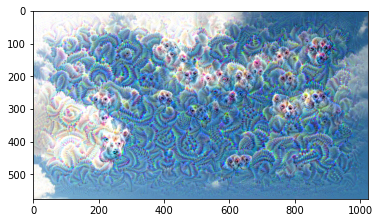

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('result.png')
plt.imshow(img)
plt.show()

**Problem 4.2**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pomeranian.jpg to pomeranian (1).jpg


ERROR! Session/line number was not unique in database. History logging moved to new session 59


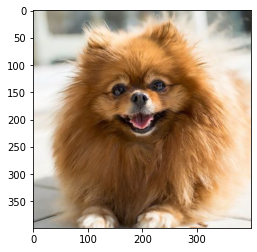

In [ ]:
img_pom = mpimg.imread('pomeranian.jpg')
plt.imshow(img_pom)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tabby.jpg to tabby (1).jpg


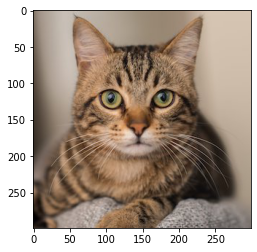

In [ ]:
img_tab = mpimg.imread('tabby.jpg')
plt.imshow(img_tab)
plt.show()

In [ ]:
import numpy as np
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

model = InceptionV3(include_top=True, weights='imagenet')

96116736/96112376 [==============================] - 2s 0us/step


**Input Image: Pomeranian**

In [ ]:
img_path = 'pomeranian.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

40960/35363 [==================================] - 0s 0us/step
Predicted: [[('n02112018', 'Pomeranian', 0.94647586), ('n02112350', 'keeshond', 0.0091330325), ('n03961711', 'plate_rack', 0.0020738805), ('n02085782', 'Japanese_spaniel', 0.00109469), ('n02086910', 'papillon', 0.00076946395)]]


In [ ]:
p_pomeranian_0 = preds[0,259]
p_pomeranian_0

0.94647586

In [ ]:
p_tabby_0 = preds[0,281]
p_tabby_0

2.2178552e-05

**Input Image: Tabby**

In [ ]:
img_path = 'tabby.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Predicted: [[('n02123045', 'tabby', 0.9304172), ('n02123159', 'tiger_cat', 0.039435226), ('n02124075', 'Egyptian_cat', 0.018322371), ('n04367480', 'swab', 0.0010399548), ('n04040759', 'radiator', 0.00020865083)]]


In [ ]:
p_pomeranian_1 = preds[0,259]
p_pomeranian_1

8.810352e-06

In [ ]:
p_tabby_1 = preds[0,281]
p_tabby_1

0.9304172

The four scores are:
$$
p_{0,259}= 0.94647586
$$
$$
p_{0,281} = 2.2178552e-05
$$
$$
p_{1,259}= 8.810352e-06
$$
$$
p_{1,281} = 0.9304172
$$